# setup

In [ ]:
!pip install ucimlrepo

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

In [ ]:
meta = energy_efficiency.variables
meta

,name,role,type,demographic,description,units,missing_values
0,X1,Feature,Continuous,None,Relative Compactness,None,no
1,X2,Feature,Continuous,None,Surface Area,None,no
2,X3,Feature,Continuous,None,Wall Area,None,no
3,X4,Feature,Continuous,None,Roof Area,None,no
4,X5,Feature,Continuous,None,Overall Height,None,no
5,X6,Feature,Integer,None,Orientation,None,no
6,X7,Feature,Continuous,None,Glazing Area,None,no
7,X8,Feature,Integer,None,Glazing Area Distribution,None,no
8,Y1,Target,Continuous,None,Heating Load,None,no
9,Y2,Target,Continuous,None,Cooling Load,None,no


let's perform some EDA to better investigate the dataset

In [ ]:
df = pd.concat([X, y], axis=1)

# EDA

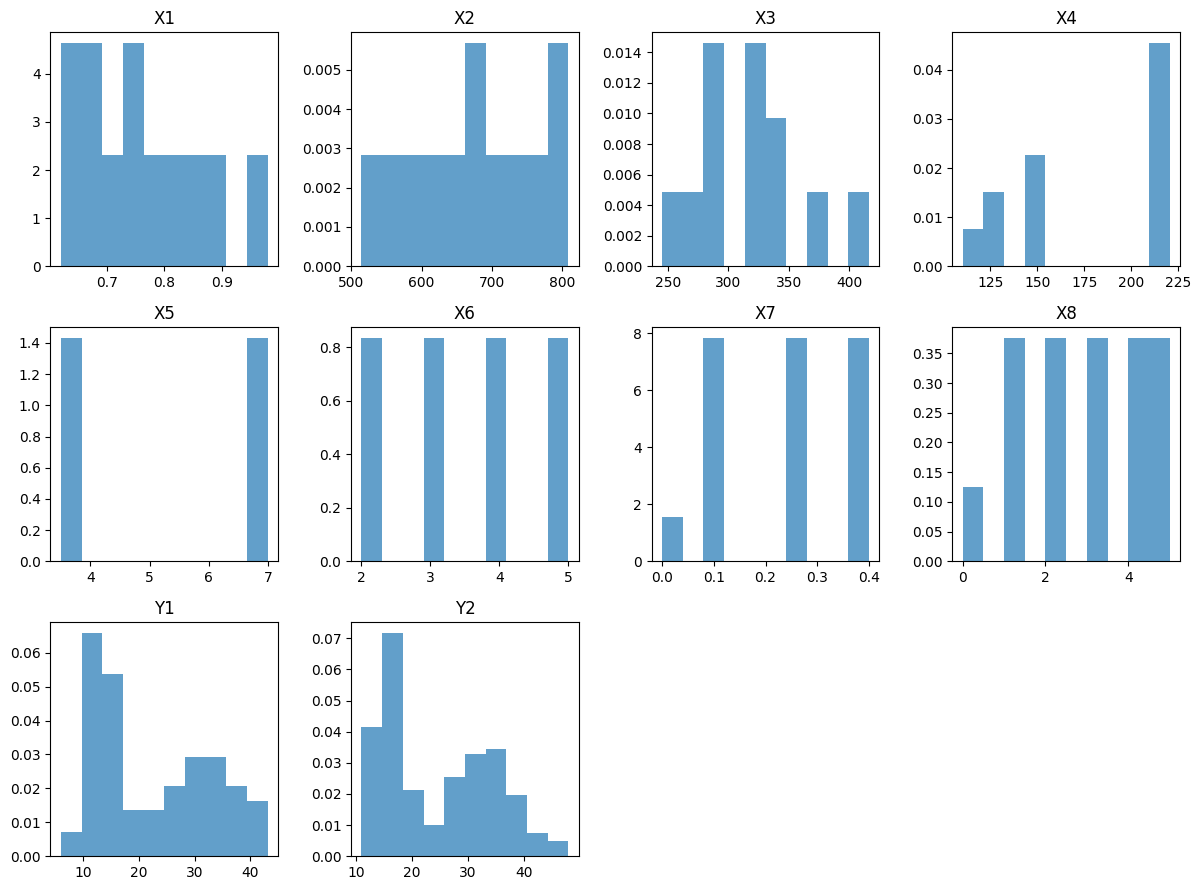

In [ ]:
n_cols = 4
n_rows = math.ceil(len(df.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
  axes[idx].hist(df[col], alpha=0.7, ec = 'w', density = True)
  axes[idx].set_title(f'{col}')

for idx in range(len(df.columns), len(axes)):
  fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

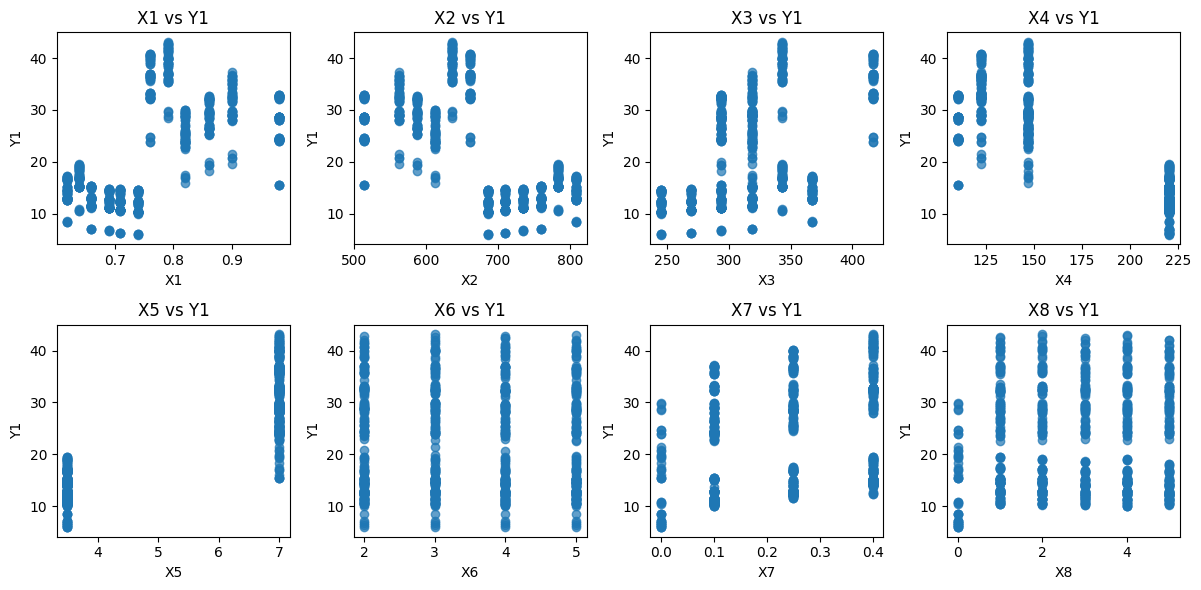

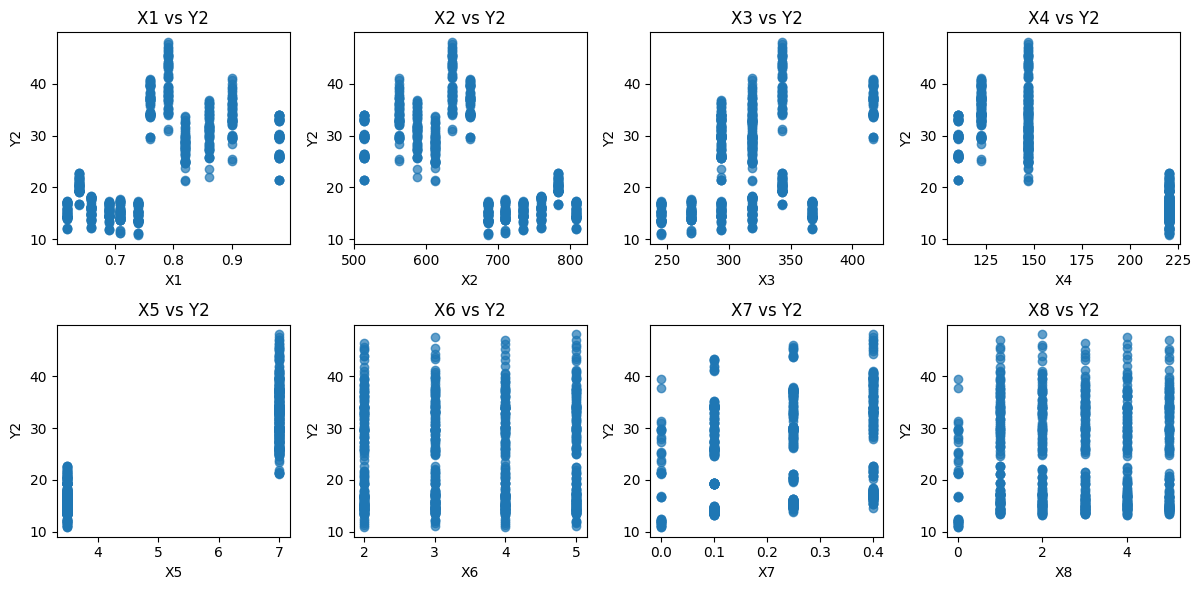

In [ ]:
for i in ['Y1', 'Y2']:
  n_cols = 4
  n_rows = math.ceil(len(X.columns) / n_cols)

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
  axes = axes.flatten()

  for idx, col in enumerate(X.columns):
      axes[idx].scatter(df[col], df[i], alpha=0.7)
      axes[idx].set_title(f'{col} vs {i}')
      axes[idx].set_xlabel(col)
      axes[idx].set_ylabel(i)

  for idx in range(len(X.columns), len(axes)):
      fig.delaxes(axes[idx])

  plt.tight_layout()
  plt.show()
  print('\n\n\n')

In [ ]:
#scaling Y1 and Y2 though not required
cluster_df = df[['Y1', 'Y2']]
scaler = MinMaxScaler()
cluster_df = scaler.fit_transform(cluster_df)
cluster_df = pd.DataFrame(cluster_df, columns=df[['Y1', 'Y2']].columns)

In [ ]:
#lr
model = LinearRegression()
model.fit(np.array(cluster_df['Y1']).reshape(-1,1), cluster_df['Y2'])

LinearRegression()

In [ ]:
#clustering
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(cluster_df)
cluster_df['cluster'] = y_pred

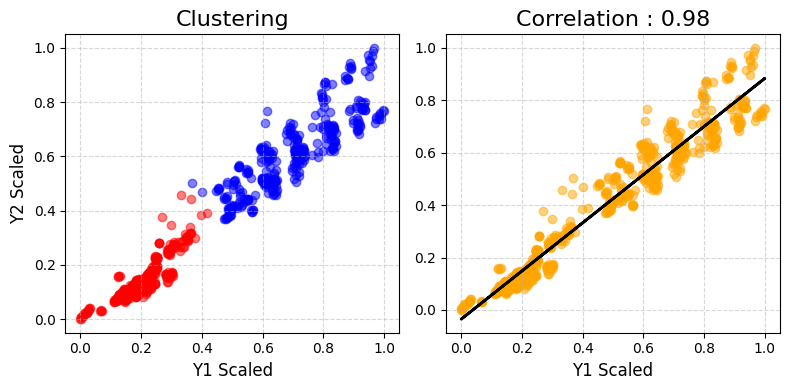

In [ ]:
corr = np.round(df["Y1"].corr(df["Y2"]), 2)
cluster1 = cluster_df[cluster_df['cluster'] == 0]
cluster2 = cluster_df[cluster_df['cluster'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Clustering Plot
axes[0].scatter(cluster1['Y1'], cluster1['Y2'], color='blue', alpha=0.5)
axes[0].scatter(cluster2['Y1'], cluster2['Y2'], color='red', alpha=0.5)
axes[0].set_title('Clustering', fontsize=16)
axes[0].set_xlabel('Y1 Scaled', fontsize=12)
axes[0].set_ylabel('Y2 Scaled', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Linear Regression Plot
axes[1].scatter(cluster_df['Y1'], cluster_df['Y2'], alpha=0.5, color = 'orange')
axes[1].plot(cluster_df['Y1'], model.predict(np.array(cluster_df['Y1']).reshape(-1, 1)), color='k', linewidth=2)
axes[1].set_title(f'Correlation : {corr}', fontsize=16)
axes[1].set_xlabel('Y1 Scaled', fontsize=12)
axes[1].set_xlabel('Y1 Scaled', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
x = 0.4 *np.std(df['Y1']) + df['Y1'].mean()

mu1 = df[df['Y1'] <= x]['Y1'].mean()
mu2 = df[df['Y1'] > x]['Y1'].mean()
mu = df['Y1'].mean()
med1 = df[df['Y1'] <= x]['Y1'].median()
med2 = df[df['Y1'] > x]['Y1'].median()

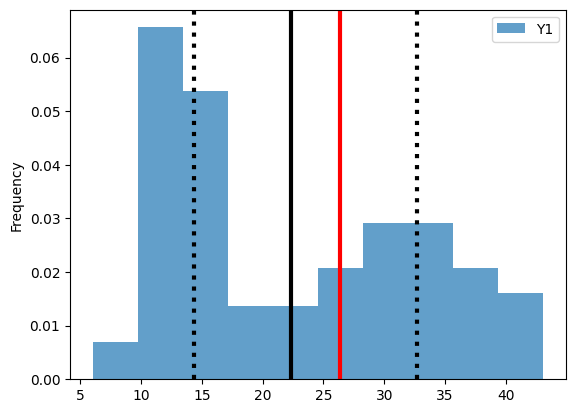

In [ ]:
df.plot(kind='hist', y='Y1', alpha=0.7, ec = 'w', density = True)
# plt.axvline(mu1, color = 'k', linestyle = '--', linewidth = 3)
# plt.axvline(mu2, color = 'k', linestyle = '--', linewidth = 3)
plt.axvline(med1, color = 'k', linestyle = ':', linewidth = 3)
plt.axvline(med2, color = 'k', linestyle = ':', linewidth = 3)
plt.axvline(mu, color = 'k', linestyle = '-', linewidth = 3)
plt.axvline(x, color = 'red', linewidth = 3);

#Splitted MLR

In [ ]:
def pred_mlr(data):

  X_train, X_test, y_train, y_test = train_test_split(data[X.columns], data[y.columns], test_size= 0.3, random_state = 10)

  train = pd.concat([X_train, y_train], axis=1)
  test = pd.concat([X_test, y_test], axis=1)

  model = LinearRegression()
  model.fit(train[X.columns], train[y.columns])

  pred = model.predict(test[X.columns])
  predicted = test.assign(Y1_pred = pred[:,0], Y2_pred = pred[:,1])
  return predicted

In [ ]:
def plot_pred_mlr(data):
  predicted = pred_mlr(data)
  for i in ['Y1', 'Y2']:
    n_cols = 4
    n_rows = math.ceil(len(X.columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(X.columns):
        axes[idx].scatter(predicted[col], predicted[i], alpha=0.7)
        axes[idx].scatter(predicted[[col]], predicted[i+'_pred'], alpha=0.7, c = 'r')
        axes[idx].set_title(f'{col} vs {i}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel(i)

    for idx in range(len(X.columns), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()
    print('\n\n\n')

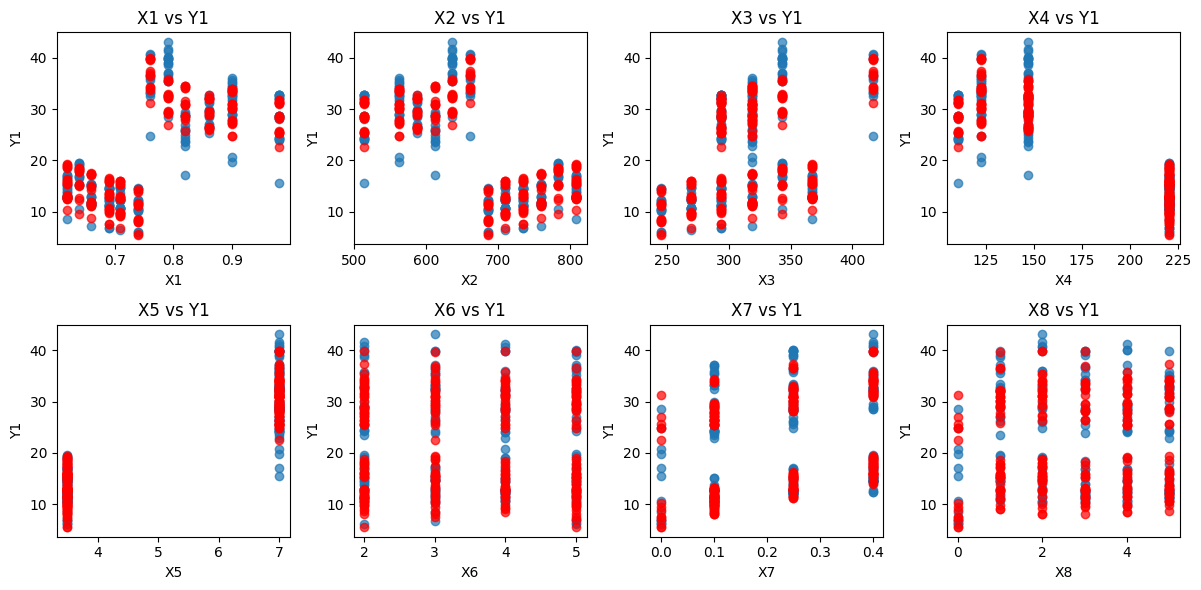

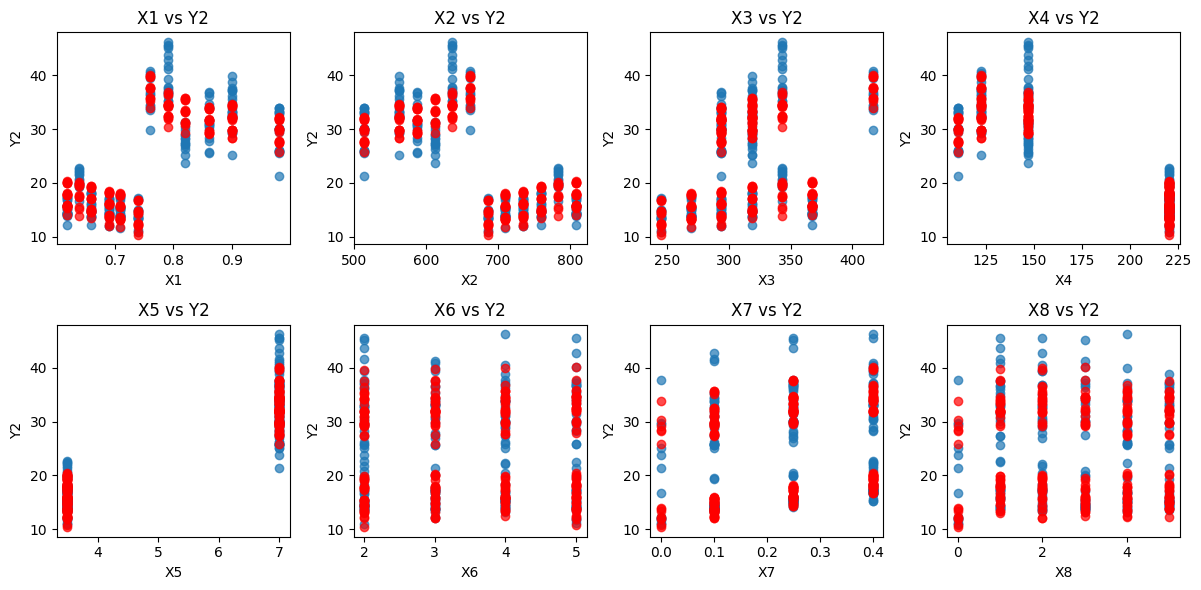

In [ ]:
plot_pred_mlr(df)

In [ ]:
def residual(data):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns
    axes = axes.flatten()
    predicted = pred_mlr(data)

    for idx, i in enumerate(['Y1', 'Y2']):
        res = np.array(predicted[i]-predicted[f'{i}_pred'])
        actual = np.array(predicted[f'{i}_pred'])

        axes[idx].scatter(actual, res, alpha=0.7)
        axes[idx].axhline(y=0, color='r', linestyle='-')
        axes[idx].set_xlabel(f'Actual {i}')
        axes[idx].set_ylabel('Residuals')
        axes[idx].set_title(f'{i} Residual')

    plt.tight_layout()
    plt.show()

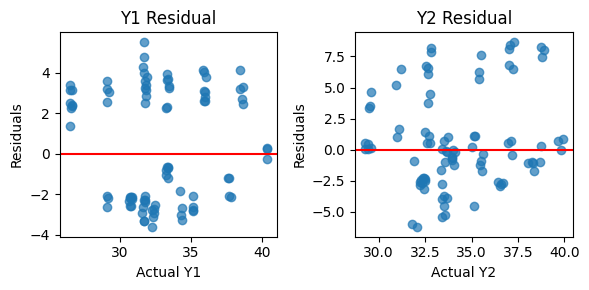

In [ ]:
residual(df[df['Y1']>x])

In [ ]:
def r2(data):
    predicted = pred_mlr(data)
    y_true = np.array(predicted[['Y1', 'Y2']])
    y_pred = np.array(predicted[['Y1_pred', 'Y2_pred']])
    score = r2_score(y_true, y_pred)
    return score

In [ ]:
r2(df)

0.911761780913406

In [ ]:
predicted = pred_mlr(df)

In [ ]:
predicted['Y1']

,Y1
568,19.52
620,16.76
456,12.32
197,28.05
714,19.00
...,...
345,29.87
408,11.80
304,38.67
686,28.64


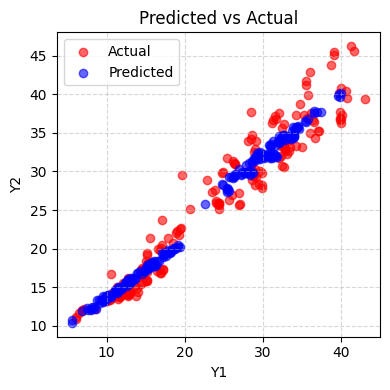

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(np.array(predicted['Y1']), np.array(predicted['Y2']),color='red', alpha=0.6, label='Actual')
plt.scatter(np.array(predicted['Y1_pred']), np.array(predicted['Y2_pred']),color='blue', alpha=0.6, label='Predicted')
plt.title('Predicted vs Actual')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

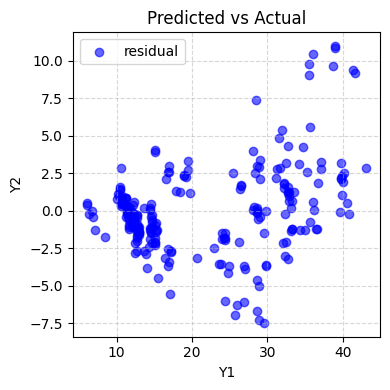

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(np.array(predicted['Y1']), np.array(predicted['Y2'])- np.array(predicted['Y2_pred']),color='blue', alpha=0.6, label='residual')
plt.title('Predicted vs Actual')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
dfg20 = df[(df['Y1']>x)]
dfl20 = df[(df['Y1']<=x)]
split_df = pd.concat([dfl20, dfg20], ignore_index=True)

In [ ]:
r2(split_df)

0.9031365271725347

# Poly Reg

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def pred_poly_reg(data, degree=2):
    X_train, X_test, y_train, y_test = train_test_split(
        data[X.columns], data[y.columns], test_size=0.3, random_state=10
    )

    # Creating polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fitting the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Making predictions
    pred = model.predict(X_test_poly)

    # Adding predictions to the test DataFrame
    predicted = pd.DataFrame(X_test, columns=X.columns).assign(
        **{f"Y{i+1}_pred": pred[:, i] for i in range(pred.shape[1])},
        **{col: y_test[col].values for col in y_test.columns}
    )

    return predicted


In [ ]:
def plot_pred_mlr(data):
  predicted = pred_mlr(data)
  for i in ['Y1', 'Y2']:
    n_cols = 4
    n_rows = math.ceil(len(X.columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(X.columns):
        axes[idx].scatter(predicted[col], predicted[i], alpha=0.7)
        axes[idx].scatter(predicted[[col]], predicted[i+'_pred'], alpha=0.7, c = 'r')
        axes[idx].set_title(f'{col} vs {i}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel(i)

    for idx in range(len(X.columns), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()
    print('\n\n\n')

#MLR

In [ ]:
def mlr(data, plot = True, residual = True):

  X_train, X_test, y_train, y_test = train_test_split(data[X.columns], data[y.columns], test_size= 0.3, random_state = 10)

  train = pd.concat([X_train, y_train], axis=1)
  test = pd.concat([X_test, y_test], axis=1)

  model = LinearRegression()
  model.fit(train[X_train.columns], train[y_train.columns])

  pred = model.predict(test[X_test.columns])
  predicted = test.assign(Y1_pred = pred[:,0], Y2_pred = pred[:,1])

  if plot:

    for i in ['Y1', 'Y2']:
      n_cols = 4
      n_rows = math.ceil(len(X.columns) / n_cols)

      fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
      axes = axes.flatten()

      for idx, col in enumerate(X_test.columns):
          axes[idx].scatter(test[col], test[i], alpha=0.7)
          axes[idx].scatter(test[[col]], predicted[i+'_pred'], alpha=0.7, c = 'r')
          axes[idx].set_title(f'{col} vs {i}')
          axes[idx].set_xlabel(col)
          axes[idx].set_ylabel(i)

      for idx in range(len(X.columns), len(axes)):
          fig.delaxes(axes[idx])

      plt.tight_layout()
      plt.show()
      print('\n\n\n')

    if residual:
        # Create subplots with 1 row and 2 columns
        fig, axes = plt.subplots(1, 2, figsize=(6, 3))

        for idx, i in enumerate(['Y1', 'Y2']):
            # Scatter plot of residuals for Y1 and Y2
            axes[idx].scatter(np.array(y_test[i]), np.array(y_test[i]) - np.array(predicted[i + '_pred']), alpha=0.7)
            axes[idx].axhline(y=0, color='r', linestyle='-')
            axes[idx].set_xlabel(f'Actual {i}')
            axes[idx].set_ylabel('Residuals')
            axes[idx].set_title(f'{i} Residual')

        plt.tight_layout()
        plt.show()
        print('\n\n\n')

  return predicted

In [ ]:
dfg20 = df[(df['Y1']>20) & (df['Y2']>20)]
dfl20 = df[(df['Y1']<=20) & (df['Y2']<=20)]

mlrl20 = mlr(dfl20, residual = False, plot = False)
mlrg20 = mlr(dfg20, residual = False, plot = False)
full_mlr = mlr(df, residual = False, plot = False)

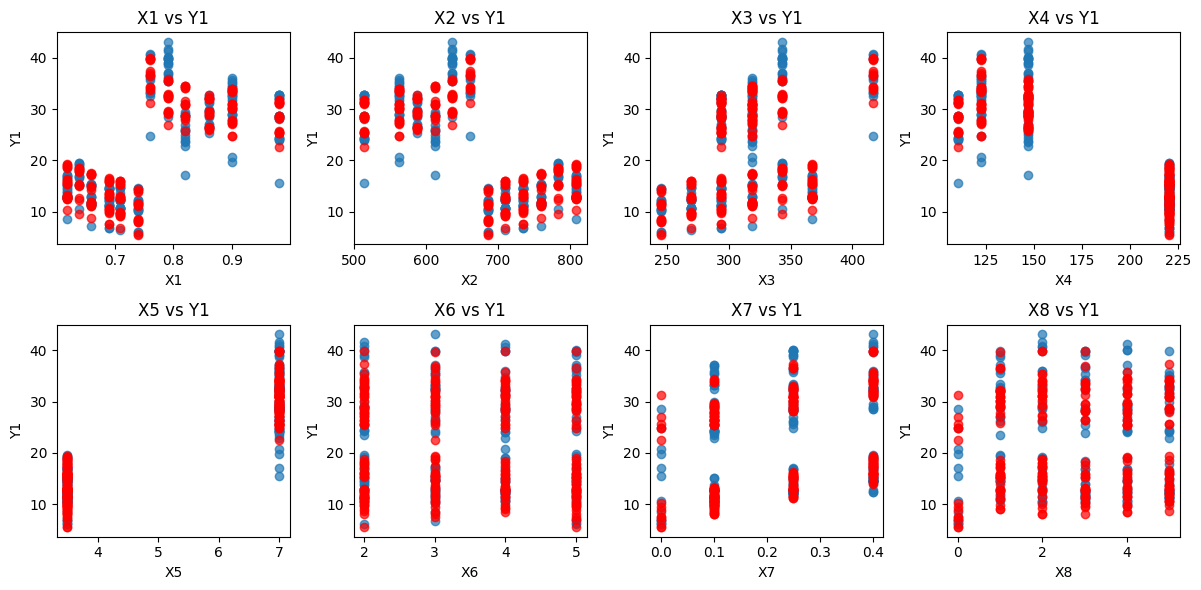

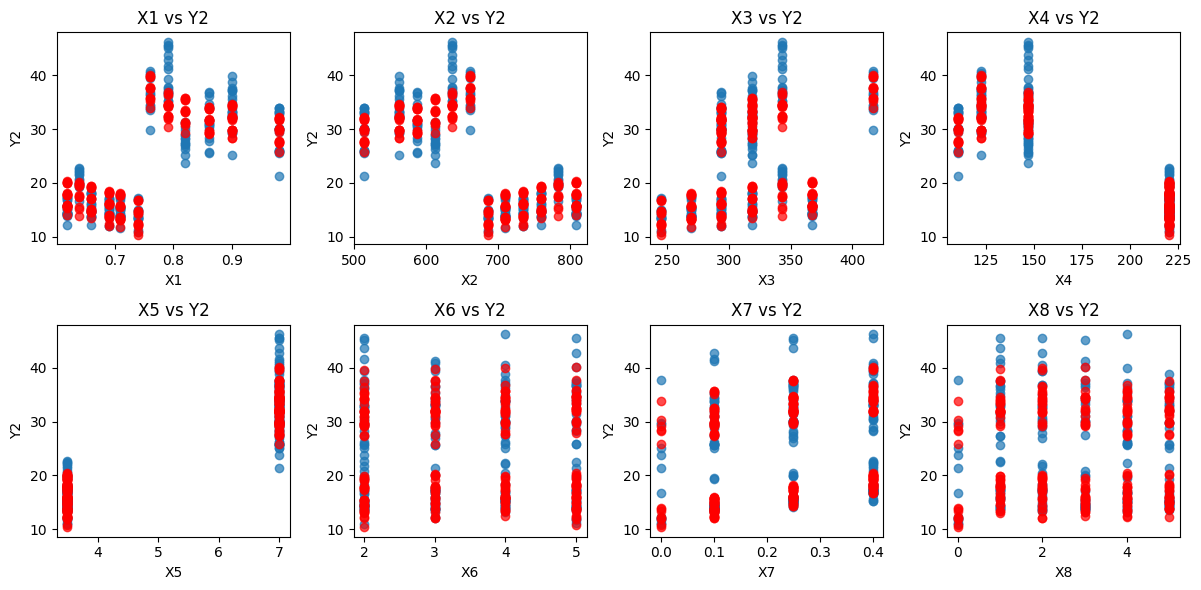

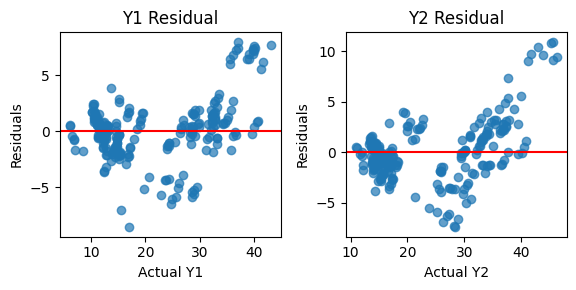

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Y1_pred,Y2_pred
568,0.64,784.0,343.0,220.5,3.5,2,0.40,1,19.52,22.72,17.886174,19.405433
620,0.62,808.5,367.5,220.5,3.5,2,0.40,2,16.76,17.36,18.767683,19.901031
456,0.74,686.0,245.0,220.5,3.5,2,0.25,4,12.32,14.92,11.477602,14.348042
197,0.90,563.5,318.5,122.5,7.0,3,0.10,4,28.05,33.91,27.697582,29.895738
714,0.64,784.0,343.0,220.5,3.5,4,0.40,4,19.00,22.25,18.419596,19.875027
...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.86,588.0,294.0,147.0,7.0,3,0.25,2,29.87,27.89,29.160399,31.532927
408,0.74,686.0,245.0,220.5,3.5,2,0.25,3,11.80,14.49,11.278129,14.284358
304,0.79,637.0,343.0,147.0,7.0,2,0.25,1,38.67,43.80,32.205608,34.136227
686,0.82,612.5,318.5,147.0,7.0,4,0.40,4,28.64,31.14,34.487731,35.752266


In [ ]:
mlr(df)

In [ ]:
mlr = pd.concat([mlrl20, mlrg20], ignore_index=True)

In [ ]:
def r2_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    total_variance = np.sum((y_true - np.mean(y_true, axis=0)) ** 2, axis=0)
    residual_variance = np.sum((y_true - y_pred) ** 2, axis=0)

    r2 = 1 - (residual_variance / total_variance)
    return np.mean(r2)

In [ ]:
r2_score(full_mlr[['Y1', 'Y2']], full_mlr[['Y1_pred', 'Y2_pred']])

0.911761780913406

In [ ]:
r2_score(mlr[['Y1', 'Y2']], mlr[['Y1_pred', 'Y2_pred']])

0.9340432539333143

# Cluster

In [ ]:
dfc = df[['X1', 'Y1']]
scaler = MinMaxScaler()
dfc = scaler.fit_transform(dfc)
dfc = pd.DataFrame(dfc, columns=df[['X1', 'Y1']].columns)

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(dfc)
dfc['cluster'] = y_pred

cluster1 = dfc[dfc['cluster'] == 0]
cluster2 = dfc[dfc['cluster'] == 1]

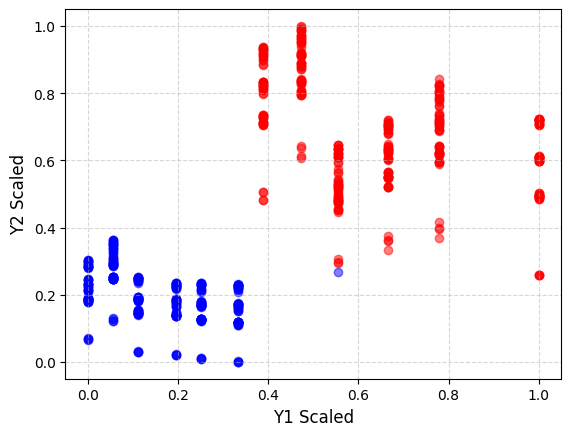

In [ ]:
plt.scatter(cluster1['X1'], cluster1['Y1'], color='blue', alpha=0.5)
plt.scatter(cluster2['X1'], cluster2['Y1'], color='red', alpha=0.5)
plt.xlabel('Y1 Scaled', fontsize=12)
plt.ylabel('Y2 Scaled', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

In [ ]:
d = {}

for i in df.columns[:2]:
  d[i] = np.unique(df[i])

pd.DataFrame(d)

,X1,X2
0,0.62,514.5
1,0.64,563.5
2,0.66,588.0
3,0.69,612.5
4,0.71,637.0
5,0.74,661.5
6,0.76,686.0
7,0.79,710.5
8,0.82,735.0
9,0.86,759.5
